# SDAB Melting Temperature Prediction using DL

### Load Modules and Datasets

In [1]:
### Initialize seed for reproducibility
import numpy as np
np.random.seed(0)
import math

### Data Wrangling and Plots
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.models import Sequential
from keras.layers import Dense
import keras

In [3]:
# single set of predictors
#data = pd.read_csv("./tm_predictors/tm_dataset_nsp.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_af2.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_pchars_maestro.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_650M.csv", header=None)
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_3B.csv", header=None)
data = pd.read_csv("./tm_predictors/tm_dataset_ESM_15B.csv", header=None)

# combination of predictors
#data1 = pd.read_csv("./tm_predictors/tm_dataset_nsp.csv")
#data2 = pd.read_csv("./tm_predictors/tm_dataset_af2.csv")
#data3 = pd.read_csv("./tm_predictors/tm_dataset_pchars_maestro.csv")
#data4 = pd.read_csv("./tm_predictors/tm_dataset_ESM_15B.csv", header=None)
#data5 = pd.read_csv("./tm_predictors/tm_dataset_ESM_3B.csv", header=None)
#data6 = pd.read_csv("./tm_predictors/tm_dataset_ESM_650M.csv", header=None)
#data = pd.concat([#data1,
                  #data2,
                  #data3,
                  #data4,
                  #data5],
                  #data6],
                  #ignore_index=False, sort=False, axis=1)
data.head()

0         1         2         3         4         5         6     \
0  0.004451 -0.026736 -0.000681 -0.036856 -0.112569  0.052918  0.034112   
1 -0.004392 -0.049151  0.028632 -0.031678 -0.106301  0.064784  0.037541   
2 -0.026782 -0.012829  0.020543 -0.040270 -0.092556  0.008233  0.021450   
3 -0.026038 -0.033876  0.052316 -0.035356 -0.085919  0.020241  0.020386   
4 -0.011584 -0.002739 -0.000718 -0.064319 -0.044984  0.027685  0.030403   

       7         8         9     ...      5110      5111      5112      5113  \
0  0.069336  0.041242 -0.084181  ... -0.063513  0.160511  0.017313 -0.130935   
1  0.065528  0.054021 -0.020974  ... -0.075691  0.175937  0.031647 -0.097111   
2  0.119111  0.037800 -0.079169  ... -0.029368  0.129198  0.027107 -0.101219   
3  0.115664  0.031752 -0.032354  ... -0.037434  0.148046  0.037963 -0.056533   
4  0.116130  0.075513 -0.086494  ...  0.021375  0.108914  0.081281 -0.100116   

       5114      5115      5116      5117      5118      5119  
0  0.016956  0.063607 -0.015622 -0.000625 -0.050451  0.048337  
1  0.014959  0.026592  0.013965 -0.015340 -0.071479  0.072360  
2 -0.024505  0.012899 -0.035465 -0.023821 -0.097226  0.050777  
3 -0.020794 -0.006809 -0.001360 -0.046397 -0.112732  0.085475  
4 -0.104530  0.032080  0.026306 -0.048092 -0.049530  0.067671  

[5 rows x 5120 columns]

In [4]:
y = pd.read_excel("sdab_data.xlsx")
y = y.tm
x = data

# assign 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# check assignments - y should be Tms only
print(x)
print(y)

         0         1         2         3         4         5         6     \
0    0.004451 -0.026736 -0.000681 -0.036856 -0.112569  0.052918  0.034112   
1   -0.004392 -0.049151  0.028632 -0.031678 -0.106301  0.064784  0.037541   
2   -0.026782 -0.012829  0.020543 -0.040270 -0.092556  0.008233  0.021450   
3   -0.026038 -0.033876  0.052316 -0.035356 -0.085919  0.020241  0.020386   
4   -0.011584 -0.002739 -0.000718 -0.064319 -0.044984  0.027685  0.030403   
..        ...       ...       ...       ...       ...       ...       ...   
562  0.017933  0.030289 -0.027982 -0.039387 -0.062664  0.020131  0.032588   
563 -0.024302 -0.005895 -0.026037 -0.025555 -0.014472 -0.006766  0.041264   
564 -0.031473 -0.031347 -0.057759 -0.013305 -0.036420 -0.007608  0.049189   
565  0.016669  0.010753 -0.002518 -0.047222 -0.042344 -0.002325  0.054203   
566 -0.037161 -0.015003  0.001932 -0.017188 -0.043752 -0.008229  0.018025   

         7         8         9     ...      5110      5111      5112  \
0  

In [4]:
### Be wary - we would not need to scale to compare results with other model predictions.

#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

### these actually result into lower performance

### DL Model: Keras Sequential API for ANN

In [69]:
model = Sequential([
    keras.layers.Dense(128, 
                       input_shape = (x.shape[1],), # input shape is the number of predictors
                       activation = 'relu'), # Input Layer
    keras.layers.Dense(256, 
                       activation = 'relu'), # Hidden Layer (mean of neurons in the input and output layers.)
    keras.layers.Dense(256, 
                       activation = 'relu'), # Hidden Layer (mean of neurons in the input and output layers.)
    keras.layers.Dense(256, 
                       activation = 'relu'), # Hidden Layer (mean of neurons in the input and output layers.)
    keras.layers.Dense(1, 
                       activation = 'linear') # If the NN is a regressor, then the output layer has a single node.
])

model.compile(
    loss = 'mae',
    optimizer = 'adam',
    metrics= ['mae']
)

model.summary()
model_history = model.fit(x_train, y_train, epochs=1500, batch_size=32, validation_data=(x_test, y_test))

mae = mean_absolute_error(y_test, model.predict(x_test))
rmse = math.sqrt(mean_squared_error(y_test, model.predict(x_test)))
coeff_det=r2_score(y_test, model.predict(x_test))

print(mae, rmse, coeff_det)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 128)               983168    
                                                                 
 dense_56 (Dense)            (None, 256)               33024     
                                                                 
 dense_57 (Dense)            (None, 256)               65792     
                                                                 
 dense_58 (Dense)            (None, 256)               65792     
                                                                 
 dense_59 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,148,033
Trainable params: 1,148,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
15/15 [=======================

15/15 [==============================] - 0s 6ms/step - loss: 2.7920 - mae: 2.7920 - val_loss: 4.5822 - val_mae: 4.5822
Epoch 116/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.5794 - mae: 2.5794 - val_loss: 4.4419 - val_mae: 4.4419
Epoch 117/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.5908 - mae: 2.5908 - val_loss: 4.6736 - val_mae: 4.6736
Epoch 118/1500
15/15 [==============================] - 0s 6ms/step - loss: 3.3150 - mae: 3.3150 - val_loss: 4.7209 - val_mae: 4.7209
Epoch 119/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.8029 - mae: 2.8029 - val_loss: 6.4509 - val_mae: 6.4509
Epoch 120/1500
15/15 [==============================] - 0s 6ms/step - loss: 3.0827 - mae: 3.0827 - val_loss: 4.8960 - val_mae: 4.8960
Epoch 121/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.7871 - mae: 2.7871 - val_loss: 4.4352 - val_mae: 4.4352
Epoch 122/1500
15/15 [==============================] - 0s 6ms/step - loss: 2

15/15 [==============================] - 0s 6ms/step - loss: 1.8115 - mae: 1.8115 - val_loss: 4.3215 - val_mae: 4.3215
Epoch 238/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.9573 - mae: 1.9573 - val_loss: 4.2720 - val_mae: 4.2720
Epoch 239/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.9782 - mae: 1.9782 - val_loss: 4.9898 - val_mae: 4.9898
Epoch 240/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.1779 - mae: 2.1779 - val_loss: 4.5566 - val_mae: 4.5566
Epoch 241/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.2431 - mae: 2.2431 - val_loss: 4.3524 - val_mae: 4.3524
Epoch 242/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.6495 - mae: 1.6495 - val_loss: 4.7241 - val_mae: 4.7241
Epoch 243/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.1919 - mae: 2.1919 - val_loss: 4.9170 - val_mae: 4.9170
Epoch 244/1500
15/15 [==============================] - 0s 6ms/step - loss: 2

15/15 [==============================] - 0s 6ms/step - loss: 1.5279 - mae: 1.5279 - val_loss: 5.0421 - val_mae: 5.0421
Epoch 360/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.2004 - mae: 2.2004 - val_loss: 5.0707 - val_mae: 5.0707
Epoch 361/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.0134 - mae: 2.0134 - val_loss: 4.2412 - val_mae: 4.2412
Epoch 362/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.5411 - mae: 1.5411 - val_loss: 6.5804 - val_mae: 6.5804
Epoch 363/1500
15/15 [==============================] - 0s 6ms/step - loss: 3.4066 - mae: 3.4066 - val_loss: 4.3437 - val_mae: 4.3437
Epoch 364/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.6070 - mae: 1.6070 - val_loss: 4.1925 - val_mae: 4.1925
Epoch 365/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.3980 - mae: 1.3980 - val_loss: 5.2763 - val_mae: 5.2763
Epoch 366/1500
15/15 [==============================] - 0s 6ms/step - loss: 2

15/15 [==============================] - 0s 6ms/step - loss: 1.2722 - mae: 1.2722 - val_loss: 4.3066 - val_mae: 4.3066
Epoch 482/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.3521 - mae: 1.3521 - val_loss: 4.2511 - val_mae: 4.2511
Epoch 483/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.5847 - mae: 1.5847 - val_loss: 4.2893 - val_mae: 4.2893
Epoch 484/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.3819 - mae: 1.3819 - val_loss: 4.5570 - val_mae: 4.5570
Epoch 485/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.8714 - mae: 1.8714 - val_loss: 4.2578 - val_mae: 4.2578
Epoch 486/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.1816 - mae: 2.1816 - val_loss: 5.0196 - val_mae: 5.0196
Epoch 487/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.5578 - mae: 2.5578 - val_loss: 4.7874 - val_mae: 4.7874
Epoch 488/1500
15/15 [==============================] - 0s 6ms/step - loss: 2

15/15 [==============================] - 0s 6ms/step - loss: 1.6374 - mae: 1.6374 - val_loss: 4.4480 - val_mae: 4.4480
Epoch 604/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.2752 - mae: 1.2752 - val_loss: 4.5461 - val_mae: 4.5461
Epoch 605/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.5213 - mae: 1.5213 - val_loss: 4.4995 - val_mae: 4.4995
Epoch 606/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.9423 - mae: 1.9423 - val_loss: 4.7204 - val_mae: 4.7204
Epoch 607/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.4804 - mae: 2.4804 - val_loss: 4.5173 - val_mae: 4.5173
Epoch 608/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.6160 - mae: 1.6160 - val_loss: 4.2860 - val_mae: 4.2860
Epoch 609/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.2933 - mae: 1.2933 - val_loss: 4.7273 - val_mae: 4.7273
Epoch 610/1500
15/15 [==============================] - 0s 6ms/step - loss: 1

15/15 [==============================] - 0s 6ms/step - loss: 1.2422 - mae: 1.2422 - val_loss: 4.3208 - val_mae: 4.3208
Epoch 726/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.2348 - mae: 1.2348 - val_loss: 4.5936 - val_mae: 4.5936
Epoch 727/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.5047 - mae: 1.5047 - val_loss: 4.2409 - val_mae: 4.2409
Epoch 728/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.3461 - mae: 1.3461 - val_loss: 4.7454 - val_mae: 4.7454
Epoch 729/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.6340 - mae: 1.6340 - val_loss: 5.1365 - val_mae: 5.1365
Epoch 730/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.3770 - mae: 2.3770 - val_loss: 4.4213 - val_mae: 4.4213
Epoch 731/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.7980 - mae: 1.7980 - val_loss: 4.2484 - val_mae: 4.2484
Epoch 732/1500
15/15 [==============================] - 0s 6ms/step - loss: 1

15/15 [==============================] - 0s 6ms/step - loss: 1.3207 - mae: 1.3207 - val_loss: 4.4179 - val_mae: 4.4179
Epoch 848/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.4213 - mae: 2.4213 - val_loss: 5.5676 - val_mae: 5.5676
Epoch 849/1500
15/15 [==============================] - 0s 6ms/step - loss: 3.6268 - mae: 3.6268 - val_loss: 4.2871 - val_mae: 4.2871
Epoch 850/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.6514 - mae: 1.6514 - val_loss: 4.3355 - val_mae: 4.3355
Epoch 851/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.1145 - mae: 1.1145 - val_loss: 5.0569 - val_mae: 5.0569
Epoch 852/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.1296 - mae: 2.1296 - val_loss: 5.3580 - val_mae: 5.3580
Epoch 853/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.2496 - mae: 2.2496 - val_loss: 4.2137 - val_mae: 4.2137
Epoch 854/1500
15/15 [==============================] - 0s 6ms/step - loss: 1

15/15 [==============================] - 0s 6ms/step - loss: 1.1157 - mae: 1.1157 - val_loss: 4.2965 - val_mae: 4.2965
Epoch 970/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.1242 - mae: 1.1242 - val_loss: 5.1569 - val_mae: 5.1569
Epoch 971/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.1751 - mae: 2.1751 - val_loss: 4.8940 - val_mae: 4.8940
Epoch 972/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.7280 - mae: 1.7280 - val_loss: 4.2917 - val_mae: 4.2917
Epoch 973/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.2453 - mae: 1.2453 - val_loss: 4.2344 - val_mae: 4.2344
Epoch 974/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.0466 - mae: 1.0466 - val_loss: 4.3452 - val_mae: 4.3452
Epoch 975/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.9956 - mae: 0.9956 - val_loss: 4.1904 - val_mae: 4.1904
Epoch 976/1500
15/15 [==============================] - 0s 6ms/step - loss: 0

15/15 [==============================] - 0s 6ms/step - loss: 1.5976 - mae: 1.5976 - val_loss: 4.2006 - val_mae: 4.2006
Epoch 1031/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.2463 - mae: 1.2463 - val_loss: 4.6034 - val_mae: 4.6034
Epoch 1032/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.5780 - mae: 1.5780 - val_loss: 4.2473 - val_mae: 4.2473
Epoch 1033/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.1769 - mae: 1.1769 - val_loss: 4.2136 - val_mae: 4.2136
Epoch 1034/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.8836 - mae: 1.8836 - val_loss: 4.8351 - val_mae: 4.8351
Epoch 1035/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.5995 - mae: 1.5995 - val_loss: 4.2151 - val_mae: 4.2151
Epoch 1036/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.0803 - mae: 1.0803 - val_loss: 4.2200 - val_mae: 4.2200
Epoch 1037/1500
15/15 [==============================] - 0s 6ms/step - 

Epoch 1091/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.1016 - mae: 1.1016 - val_loss: 4.2194 - val_mae: 4.2194
Epoch 1092/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.9028 - mae: 0.9028 - val_loss: 4.2687 - val_mae: 4.2687
Epoch 1093/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.1216 - mae: 1.1216 - val_loss: 4.6004 - val_mae: 4.6004
Epoch 1094/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.4948 - mae: 1.4948 - val_loss: 4.4440 - val_mae: 4.4440
Epoch 1095/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.2782 - mae: 1.2782 - val_loss: 4.7551 - val_mae: 4.7551
Epoch 1096/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.4704 - mae: 1.4704 - val_loss: 4.2692 - val_mae: 4.2692
Epoch 1097/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.5721 - mae: 1.5721 - val_loss: 4.1931 - val_mae: 4.1931
Epoch 1098/1500
15/15 [==============================] 

Epoch 1212/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.1008 - mae: 1.1008 - val_loss: 4.3508 - val_mae: 4.3508
Epoch 1213/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.1318 - mae: 1.1318 - val_loss: 5.0580 - val_mae: 5.0580
Epoch 1214/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.6682 - mae: 1.6682 - val_loss: 4.1891 - val_mae: 4.1891
Epoch 1215/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.3440 - mae: 1.3440 - val_loss: 4.3062 - val_mae: 4.3062
Epoch 1216/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.8748 - mae: 0.8748 - val_loss: 4.4536 - val_mae: 4.4536
Epoch 1217/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.4810 - mae: 1.4810 - val_loss: 5.1109 - val_mae: 5.1109
Epoch 1218/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.8016 - mae: 1.8016 - val_loss: 4.2744 - val_mae: 4.2744
Epoch 1219/1500
15/15 [==============================] 

Epoch 1333/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.2601 - mae: 1.2601 - val_loss: 4.3647 - val_mae: 4.3647
Epoch 1334/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.9276 - mae: 0.9276 - val_loss: 4.2538 - val_mae: 4.2538
Epoch 1335/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.9455 - mae: 0.9455 - val_loss: 4.5934 - val_mae: 4.5934
Epoch 1336/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.2935 - mae: 1.2935 - val_loss: 4.9406 - val_mae: 4.9406
Epoch 1337/1500
15/15 [==============================] - 0s 6ms/step - loss: 2.0268 - mae: 2.0268 - val_loss: 4.2241 - val_mae: 4.2241
Epoch 1338/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.3627 - mae: 1.3627 - val_loss: 4.2066 - val_mae: 4.2066
Epoch 1339/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.7340 - mae: 1.7340 - val_loss: 4.6128 - val_mae: 4.6128
Epoch 1340/1500
15/15 [==============================] 

Epoch 1454/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.7221 - mae: 1.7221 - val_loss: 4.1862 - val_mae: 4.1862
Epoch 1455/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.9017 - mae: 0.9017 - val_loss: 4.6429 - val_mae: 4.6429
Epoch 1456/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.8951 - mae: 1.8951 - val_loss: 4.3002 - val_mae: 4.3002
Epoch 1457/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.9501 - mae: 0.9501 - val_loss: 4.2399 - val_mae: 4.2399
Epoch 1458/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.0557 - mae: 1.0557 - val_loss: 4.1781 - val_mae: 4.1781
Epoch 1459/1500
15/15 [==============================] - 0s 6ms/step - loss: 1.3327 - mae: 1.3327 - val_loss: 4.1724 - val_mae: 4.1724
Epoch 1460/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.9715 - mae: 0.9715 - val_loss: 4.2892 - val_mae: 4.2892
Epoch 1461/1500
15/15 [==============================] 

### save the model for reproducibility

In [70]:
#model.save("./saved_ANNmodels_1500epoch/pchars_maestro.keras")
#model.save("./saved_ANNmodels_1500epoch/af2.keras")
#model.save("./saved_ANNmodels_1500epoch/nsp3.keras")
#model.save("./saved_ANNmodels_1500epoch/ESM_650M.keras")
#model.save("./saved_ANNmodels_1500epoch/ESM_3B.keras")
#model.save("./saved_ANNmodels_1500epoch/ESM_15B.keras")

### combinations
#model.save("./saved_ANNmodels_1500epoch/combined_AF2_NSP3_PCHARS.keras")
#model.save("./saved_ANNmodels_1500epoch/combined_ESM15B_AF2.keras")
#model.save("./saved_ANNmodels_1500epoch/combined_ESM15B_NSP3.keras")
#model.save("./saved_ANNmodels_1500epoch/combined_ESM15B_PCHARS.keras")
#model.save("./saved_ANNmodels_1500epoch/combined_ESM15B_ESM3B.keras")
#model.save("./saved_ANNmodels_1500epoch/combined_ESM15B_ESM650M.keras")
#model.save("./saved_ANNmodels_1500epoch/combined_ESM15B_ESM3B_ESM650M.keras")

### load the model

In [5]:
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/pchars_maestro.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/af2.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/nsp3.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/ESM_650M.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/ESM_3B.keras")
model = keras.models.load_model("./saved_ANNmodels_1500epoch/ESM_15B.keras")


### combinations
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/combined_AF2_NSP3_PCHARS.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/combined_ESM15B_AF2.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/combined_ESM15B_NSP3.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/combined_ESM15B_PCHARS.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/combined_ESM15B_ESM3B.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/combined_ESM15B_ESM650M.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/combined_ESM15B_ESM3B_ESM650M.keras")

#### check diagnostics again

In [6]:
mae = mean_absolute_error(y_test, model.predict(x_test))
rmse = math.sqrt(mean_squared_error(y_test, model.predict(x_test)))
coeff_det=r2_score(y_test, model.predict(x_test))

print(mae, rmse, coeff_det)

4/4 [==============================] - 0s 2ms/step
4.030848267044442 5.661301706373775 0.7137665668159021


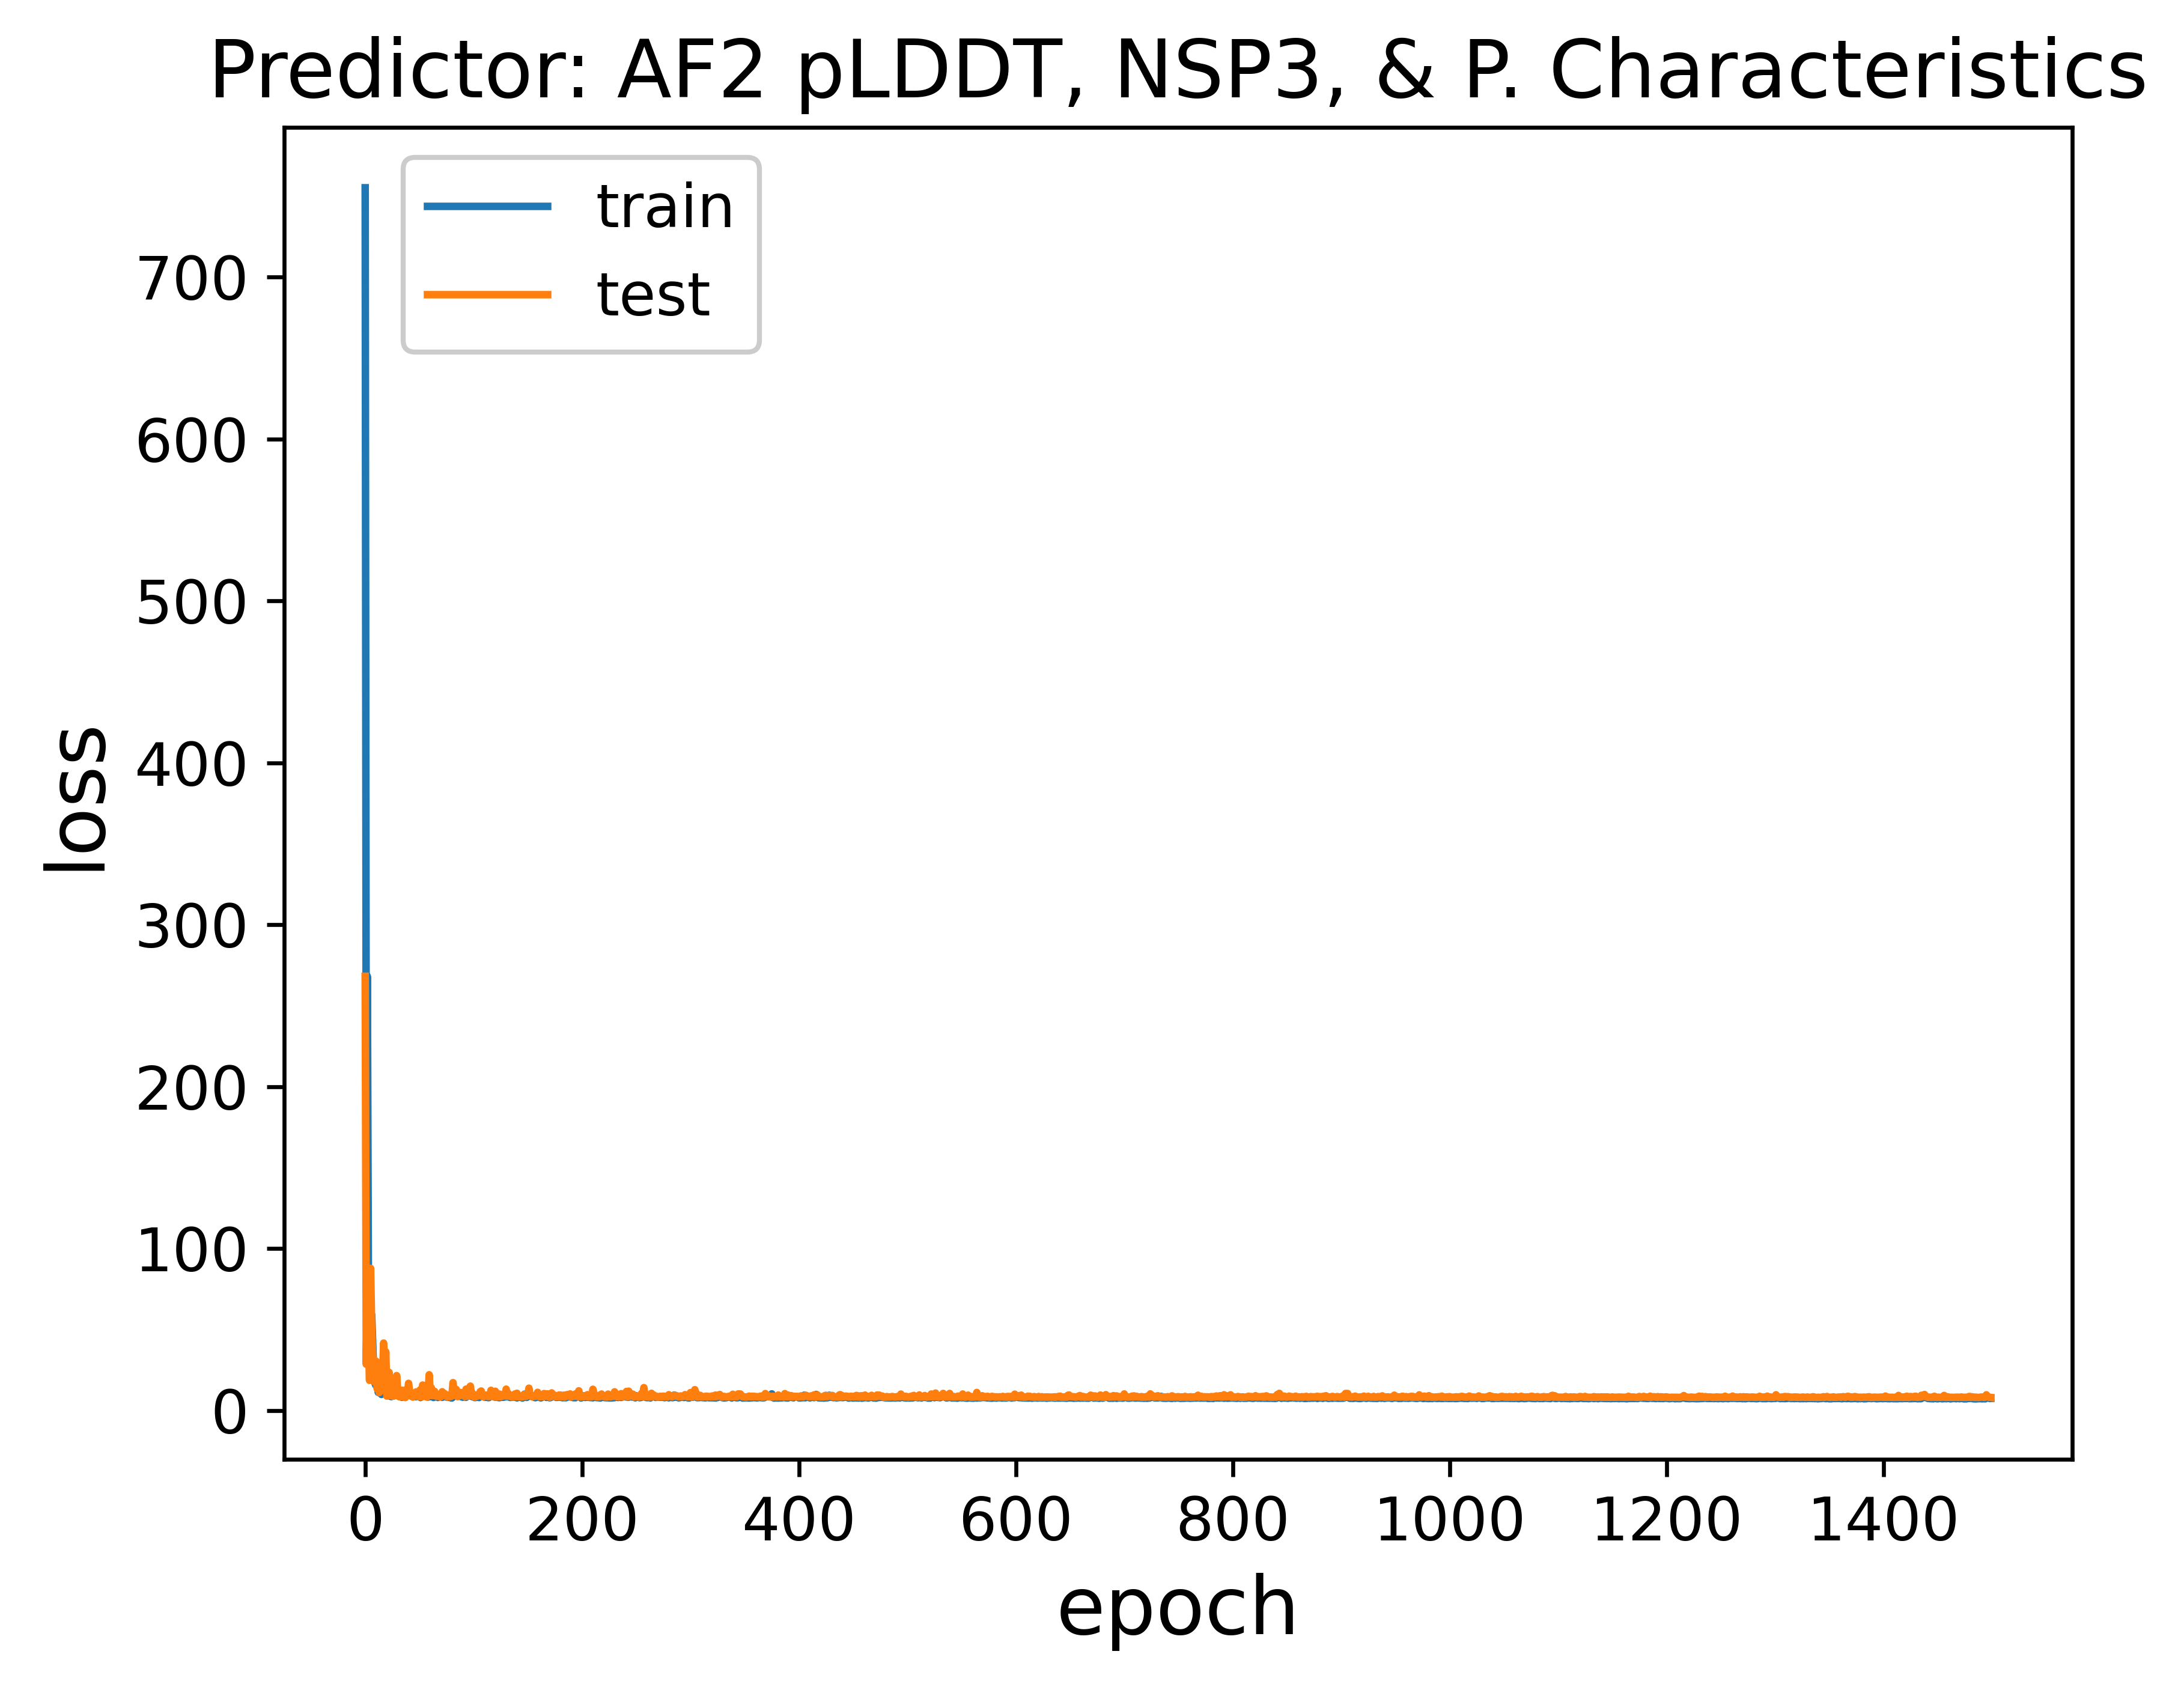

In [9]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
# single sets
#plt.title('Predictor: AlphaFold2 pLDDT Scores', fontsize=16)
#plt.title('Predictor: Physicochemical Characteristics', fontsize=16)
#plt.title('Predictor: NetSurfP3 Features', fontsize=16)
#plt.title('Predictor: ESM_15B Embeddings', fontsize=16)
# combinations
plt.title('Predictor: AF2 pLDDT, NSP3, & P. Characteristics', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.yticks(fontsize = 12) 
plt.xticks(fontsize = 12) 
plt.legend(['train', 'test'], loc='upper left', fontsize=12, framealpha=1.0, bbox_to_anchor=(0.05, 1.0))
plt.show()

In [40]:
predictions = model.predict(x_test)
results = pd.concat([y_test.reset_index(drop=True),
                     pd.DataFrame(predictions).reset_index(drop=True)],axis=1)
#results.columns = ['Actual_Tm','ESM15B_Predicted']
#results.columns = ['Actual_Tm','ESM3B_Predicted']
#results.columns = ['Actual_Tm','ESM650M_Predicted']
#results.columns = ['Actual_Tm','NSP3_Predicted']
results.columns = ['Actual_Tm','AF2_Predicted']
#results.columns = ['Actual_Tm','PCHARS_Predicted']
results

4/4 [==============================] - 0s 1ms/step


Actual_Tm  AF2_Predicted
0        55.50      65.822571
1        60.40      69.144043
2        59.00      66.598984
3        56.20      67.336365
4        56.00      68.990700
..         ...            ...
109      71.05      68.325821
110      66.90      67.393883
111      73.00      70.863258
112      49.60      66.095947
113      58.00      68.850471

[114 rows x 2 columns]

In [37]:
#results.to_csv("./tm_Predictions/DL_ESM15B.csv", index=False)
#results.to_csv("./tm_Predictions/DL_ESM3B.csv", index=False)
#results.to_csv("./tm_Predictions/DL_ESM650M.csv", index=False)
#results.to_csv("./tm_Predictions/DL_NSP3.csv", index=False)
#results.to_csv("./tm_Predictions/DL_AF2.csv", index=False)
#results.to_csv("./tm_Predictions/DL_PCHARS_MAESTRO.csv", index=False)

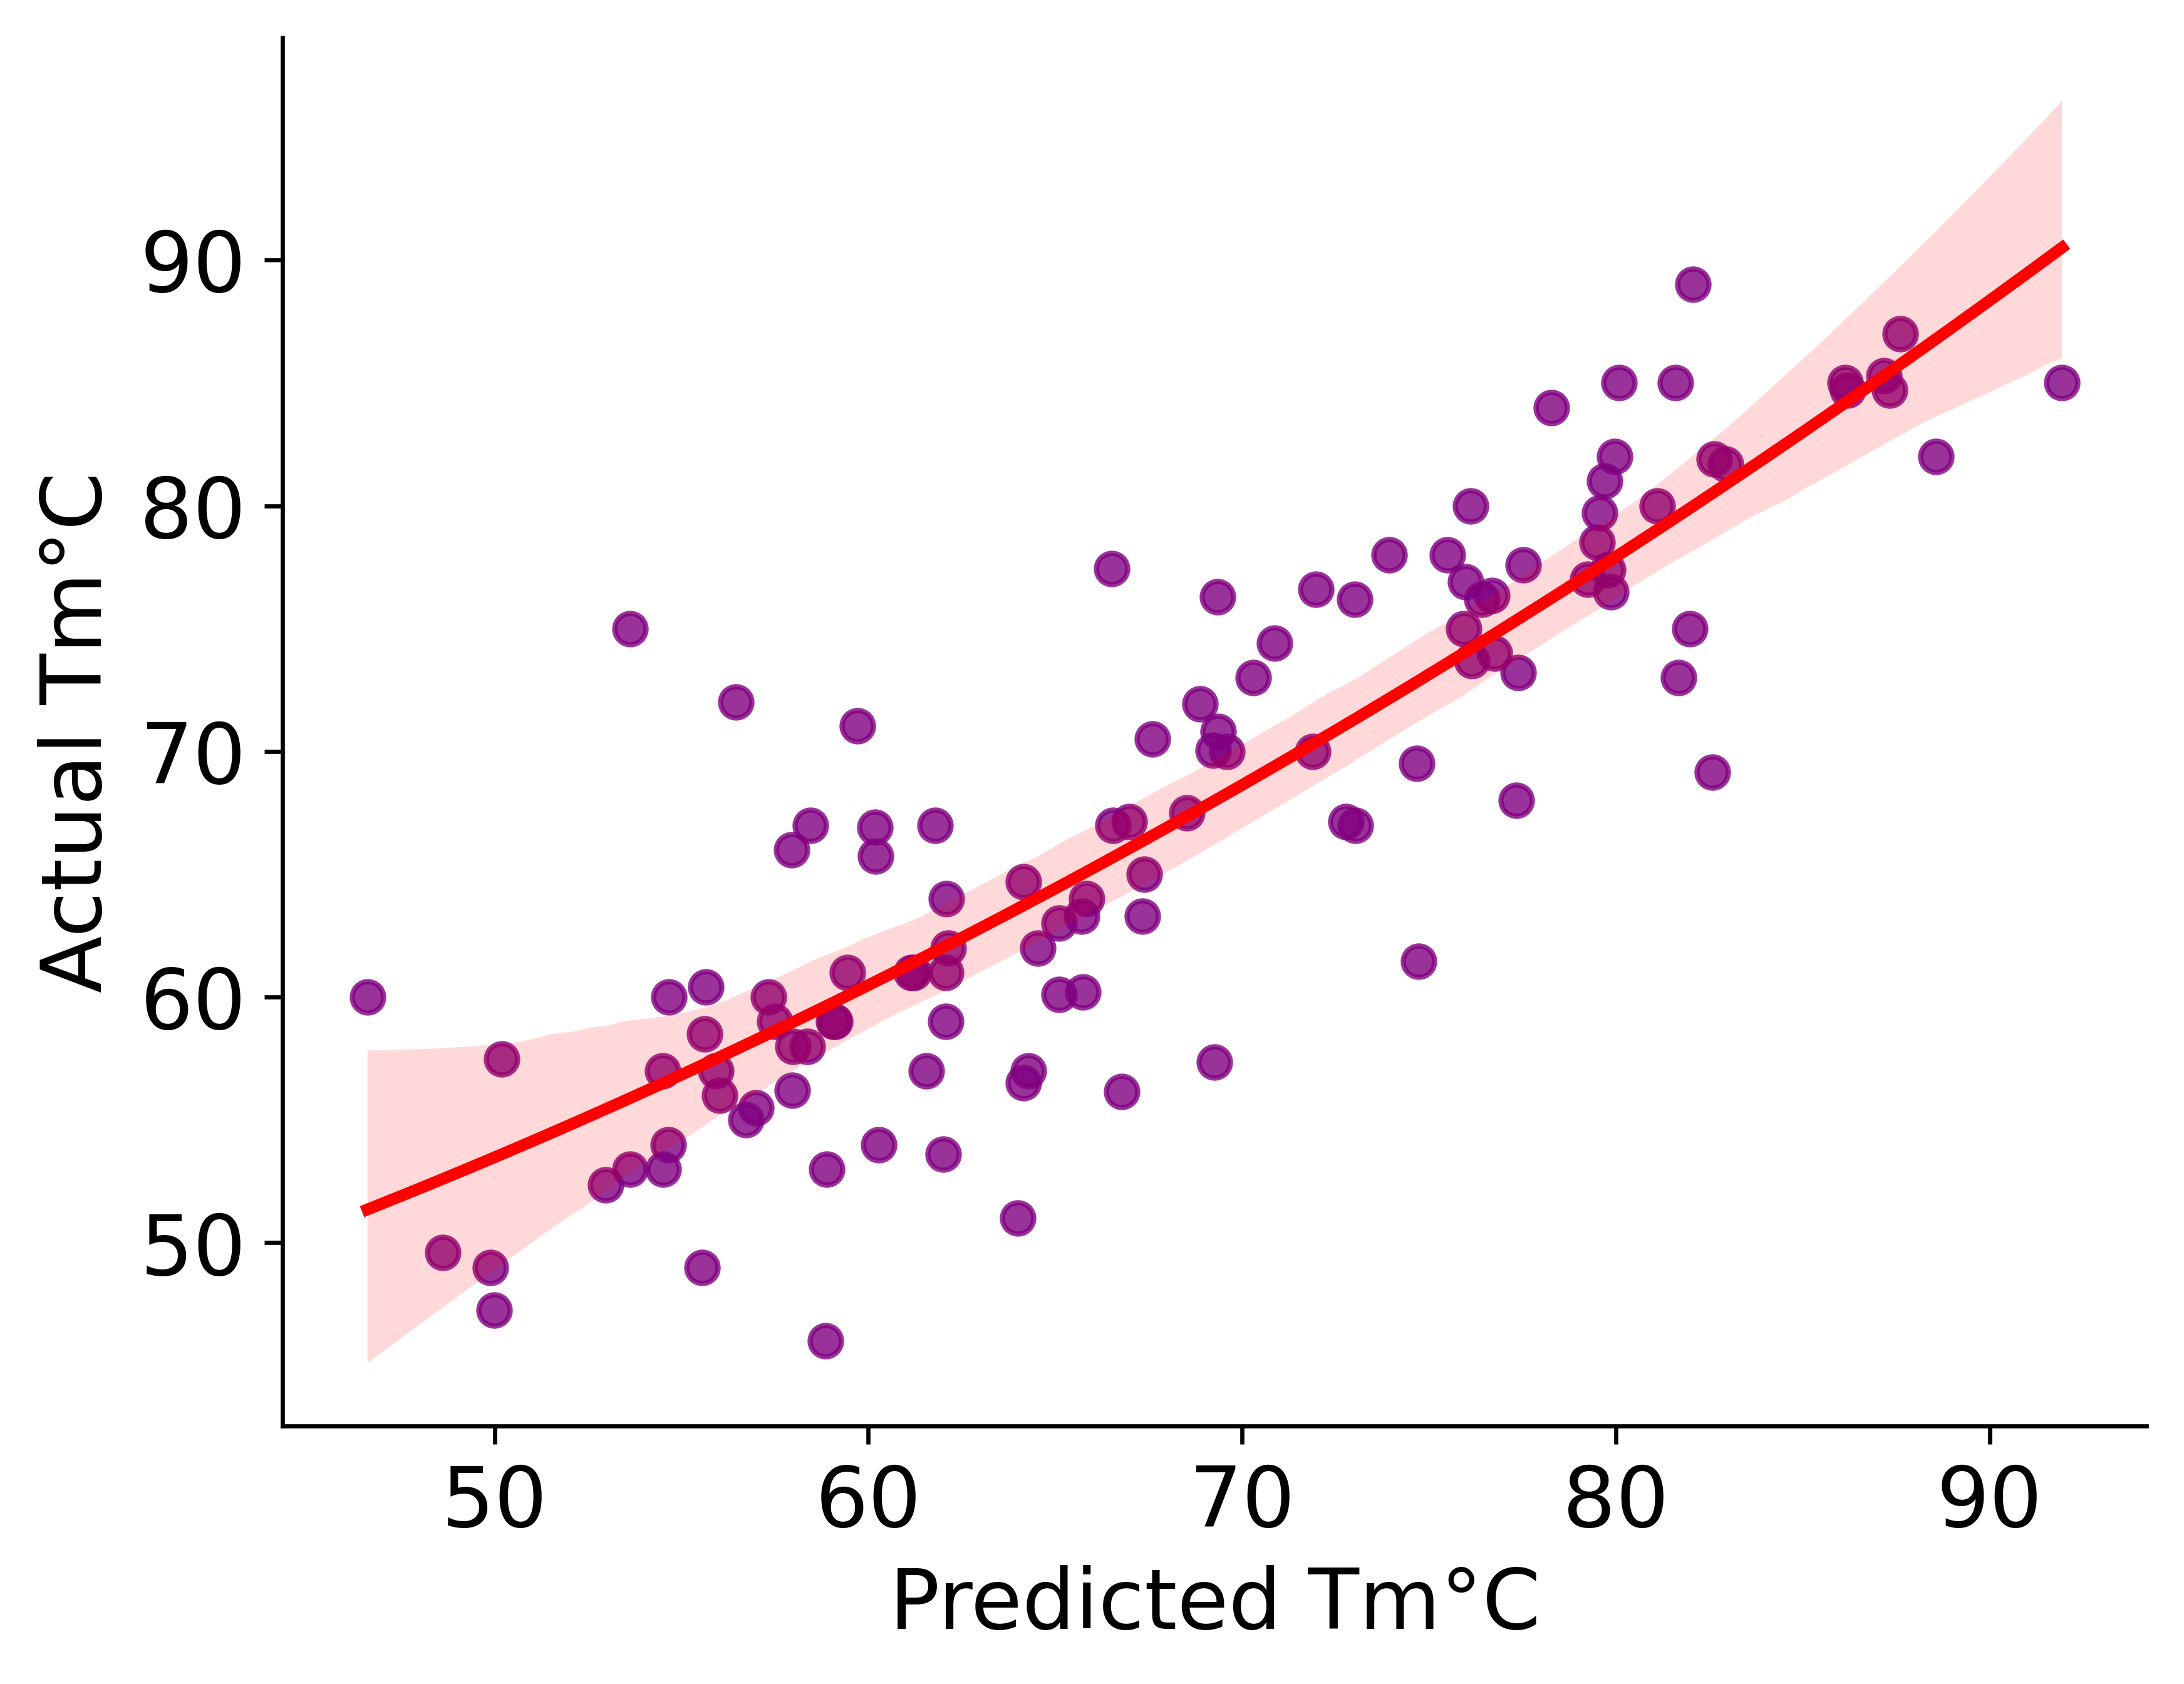

In [14]:
predicted = results.predicted
actual = results.actual
regline = sns.regplot(x=predicted, y=actual, order=2, scatter_kws={"color": "purple"}, line_kws={"color": "red"}, ci=99)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.ylabel('Actual Tm°C', fontsize=16)
plt.xlabel('Predicted Tm°C', fontsize=16)
plt.yticks(fontsize = 16) 
plt.xticks(fontsize = 16) 
plt.show()